In [1]:
import csv
import pandas as pd
import sys
#D_311 --> 72

**Negative and Positive Cohort**

Psotive and Negative cohort. 1 to 1 ratio (50% positive and 50% negative)

Basically, create a new file that contains patients who were diagnosed with diabetes and other specific 
diseases listed in diseases list.

@Input file: indexed data excludes procedures. All patients in this file are diabetics <br/>
@Output file:  a new file that contains patients who developed certain disease after 4 visits

In addition, this file also keeps track of patients IDS who are positive, such that we can take
negative patients by making sure the ID is not in the list of patients who tested positive
<hr/>
First, create two seperate files for positive and negative, then, take all positive patients and the same number from the negative patients

In [3]:
# D_311 - #~60k - index: 72 - Dipressive disorders
#  D_413 - Xk - index: 107 - ANGINA PECTORIS

diseases = ["72"] # D_389
diseases_count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
patient_ids_with_positive_cohort = []
output_file = 'HCUP_indexed_positive_d_311.csv'

csv_positive_cohort = open(output_file, mode='w')

file = 'HCUP_indexed_ex_procedures.csv'
with open(file) as csv_file:
    for line in csv_file:    
        row = line.split(',')

        for x in range(0, len(row)):
            
            if row[x] == '3': # 3 -> diabetes/D_250
                i = x
                data = row[i:] 
                # print(data)
                c = 0
                for i in range(0, len(data)):
                    if '#' in data[i]:
                        c+=1
                    if c == 2: # 2 visits
                        data_2 = data[:i]
                        data_3 = data[i:]
                        for j in range(len(diseases)):
                            for x in data_3:
                                
                                if '#' in x: x = x.split('#')[0]
                                
                                if diseases[j] == x:
                                    
                                    flag = False
                                    for y in data_2:
                                        if diseases[j] == y:
                                            flag = True
                                            break
                                    if not flag:
                                        diseases_count[j] += 1
                                        csv_positive_cohort.write(line) 
                                        patient_id = line.split('|')[0]
                                        patient_ids_with_positive_cohort.append(patient_id) # to keep track
                                        break        
                                    
                        break
                break

        
csv_positive_cohort.close()
print(diseases_count)

[135492, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Now, we have a dataset that contains all positive patients. 
Lets create a file with patients/diabetics who do not have specific disease (negative/0)

In [4]:
# Get negative cohort for med_code: D_413/index: 107
out_file = 'HCUP_indexed_negative_d_311.csv'
negative_cohort_file = open(out_file, mode='w')

file = 'HCUP_indexed_ex_procedures.csv'

with open(file, mode='r') as input_file:
    for row in input_file:
        patient_id = row.split('|')[0]
        
        # if patient id is not in the list of positive, then negative
        if patient_id not in patient_ids_with_positive_cohort:
            visits = row.replace('\n','').split('|')[2].split('#')
            if len(visits) >= 3:
                negative_cohort_file.write(row)

negative_cohort_file.close()
print("done")

done


Test and count how many negative and positive patients there are 
take all positive patients and same number of patients from negative

In [5]:
# Test data-set
file = 'HCUP_indexed_positive_d_311.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        counter+=1
print(counter)

# Test data-set
file = 'HCUP_indexed_negative_d_311.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        #print(row)
        counter+=1
print(counter)

135492
793270


Now, we have two different datasets. Positive and negative patients

Create a new file that contains 1 to 1 ratio - 50/50 balanced data

In [6]:
# 1 to 1 ratio - 50/50 - balanced data
file = 'HCUP_D_311_1_to_1.csv'
new_csv = open(file, mode='a')
input_file = 'HCUP_indexed_positive_d_311.csv'

counter = 0
with open(input_file, mode='r') as data:
    for row in data:
        counter += 1
        new_csv.write(row)
new_csv.close()
print('rows written', counter)
n_pos = counter
# first 21631 are positive

rows written 135492


In [7]:
print(n_pos)
# 1 to 1 ratio - 50/50 - balanced data
file = 'HCUP_D_311_1_to_1.csv'
new_csv = open(file, mode='a')
input_file = 'HCUP_indexed_negative_d_311.csv'

counter = 0
with open(input_file, mode='r') as data:
    for row in data:
        if counter == n_pos: break
        counter += 1
        new_csv.write(row)
new_csv.close()
# second 21631 are negative
print('rows written', counter)

135492
rows written 135492


Test and count total number - should be 21631*2 = 43262

<hr/>
<hr/>
<hr/>
<hr/>
<hr/>

Load med codes

In [8]:
codes_d = {}
file = 'disease_codes.csv'
with open(file) as input_data:
    for code in input_data:
        index = code.split(',')[0][2:-1]
        code = code.split(',')[1][1:-2]
        
        codes_d[code] = index

In [9]:
# lets take a look into the dict
print(len(codes_d))
for k, v in codes_d.items():
    print(k, '-->', v)


2399
1 --> D_402
2 --> D_424
3 --> D_250
4 --> D_416
5 --> D_428
6 --> D_852
7 --> D_276
8 --> D_782
9 --> D_401
10 --> D_780
11 --> D_285
12 --> D_518
13 --> D_507
14 --> D_038
15 --> D_995
16 --> D_907
17 --> D_458
18 --> D_692
19 --> D_263
20 --> D_438
21 --> D_787
22 --> D_482
23 --> D_584
24 --> D_599
25 --> D_008
26 --> D_799
27 --> D_560
28 --> D_486
29 --> D_578
30 --> D_427
31 --> D_553
32 --> D_262
33 --> D_041
34 --> D_997
35 --> D_585
36 --> D_403
37 --> D_536
38 --> D_294
39 --> D_151
40 --> D_682
41 --> D_272
42 --> D_354
43 --> D_357
44 --> D_278
45 --> D_681
46 --> D_362
47 --> D_707
48 --> D_327
49 --> D_425
50 --> D_786
51 --> D_491
52 --> D_571
53 --> D_456
54 --> D_572
55 --> D_303
56 --> D_453
57 --> D_280
58 --> D_496
59 --> D_300
60 --> D_296
61 --> D_501
62 --> D_185
63 --> D_515
64 --> D_305
65 --> D_789
66 --> D_600
67 --> D_595
68 --> D_530
69 --> D_591
70 --> D_287
71 --> D_441
72 --> D_311
73 --> D_433
74 --> D_356
75 --> D_255
76 --> D_426
77 --> D_412
78 

5015 --> D_V125
5016 --> D_V578
5017 --> D_V587
5018 --> D_V458
5019 --> D_V450
5020 --> D_V462
5021 --> D_V160
5022 --> D_V173
5023 --> D_V853
5024 --> D_V153
5025 --> D_V164
5026 --> D_V436
5027 --> D_V108
5028 --> D_V148
5029 --> D_V140
5030 --> D_V142
5031 --> D_V452
5032 --> D_V425
5033 --> D_V145
5034 --> D_V451
5035 --> D_V641
5036 --> D_V454
5037 --> D_V628
5038 --> D_V180
5039 --> D_V174
5040 --> D_V171
5041 --> D_V457
5042 --> D_V874
5043 --> D_V146
5044 --> D_V124
5045 --> D_V127
5046 --> D_V270
5047 --> D_V252
5048 --> D_V048
5049 --> D_V300
5050 --> D_V053
5051 --> D_V290
5052 --> D_V652
5053 --> D_V038
5054 --> D_V310
5055 --> D_V025
5056 --> D_V272
5057 --> D_V301
5058 --> D_V852
5059 --> D_V066
5060 --> D_V640
5061 --> D_V600
5062 --> D_V644
5063 --> D_V052
5064 --> D_V072
5065 --> D_V254
5066 --> D_V271
5067 --> D_V298
5068 --> D_V237
5069 --> D_V503
5070 --> D_V026
5071 --> D_V292
5072 --> D_V154
5073 --> D_V320
5074 --> D_V235
5075 --> D_V293
5076 --> D_V497
5077 -->

10255 --> P_981
10256 --> P_294
10257 --> P_808
10258 --> P_316
10259 --> P_446
10260 --> P_291
10261 --> P_973
10262 --> P_370
10263 --> P_359
10264 --> P_200
10265 --> P_390
10266 --> P_353
10267 --> P_395
10268 --> P_386
10269 --> P_954
10270 --> P_891
10271 --> P_034
10272 --> P_978
10273 --> P_837
10274 --> P_838
10275 --> P_784
10276 --> P_010
10277 --> P_552
10278 --> P_788
10279 --> P_836
10280 --> P_230
10281 --> P_537
10282 --> P_771
10283 --> P_782
10284 --> P_775
10285 --> P_217
10286 --> P_287
10287 --> P_781
10288 --> P_847
10289 --> P_300
10290 --> P_215
10291 --> P_286
10292 --> P_088
10293 --> P_710
10294 --> P_096
10295 --> P_094
10296 --> P_649
10297 --> P_352
10298 --> P_441
10299 --> P_970
10300 --> P_400
10301 --> P_931
10302 --> P_062
10303 --> P_282
10304 --> P_820
10305 --> P_427
10306 --> P_567
10307 --> P_999
10308 --> P_409
10309 --> P_263
10310 --> P_764
10311 --> P_584
10312 --> P_614
10313 --> P_401
10314 --> P_115
10315 --> P_109
10316 --> P_121
10317 --

10852 --> P_110
10853 --> P_912
10854 --> P_799
10855 --> P_190
10856 --> P_906
10857 --> P_167
10858 --> P_645
10859 --> P_411
10860 --> P_152
10861 --> P_592
10862 --> P_175
10863 --> P_130
10864 --> P_693
10865 --> P_058
10866 --> P_117
10867 --> P_888
10868 --> P_879
10869 --> P_153
10870 --> P_014
10871 --> P_233
10872 --> P_159
10873 --> P_523
10874 --> P_901
10875 --> P_073
10876 --> P_330
10877 --> P_897
10878 --> P_051
10879 --> P_059
10880 --> P_608
10881 --> P_362
10882 --> P_193
10883 --> P_636
10884 --> P_533
10885 --> P_070
10886 --> P_919


In [10]:
# count how many times a code occur per patient
file = 'HCUP_D_311_1_to_1.csv'
counter = 0

code_count = {}

patient_index = 1
with open(file) as test_data:
    for row in test_data:
        visits = row.replace('\n','').split('|')[2].split('#')
        for k in range(0,len(visits)):
            visit_codes = visits[k].split(',')[1:]
            # print(visit_codes)
            for v in visit_codes:
                code_count[v] = code_count.get(v, 0) + 1

In [11]:
# Delete those medical codes from dataset 
keys_to_delete = []
counter = 0
for k, v in code_count.items():
     if v < 50 or v > 708290:
        counter += 1
        keys_to_delete.append(k)
        
print(counter)
# delete those codes from data-set 

381


In [12]:
for i in keys_to_delete:
    print(i)
    if i == '72':
        print('-------------------------')
        print(i)
        break

3
41
11
7
5
9
86
643
692
798
5220
803
5224
5529
849
825
5485
5286
5160
5326
884
900
896
5103
756
191
860
820
5289
5499
5275
792
5080
682
5333
5463
5503
5368
5542
891
5429
5369
5445
784
342
5141
822
432
913
813
5189
5157
622
5465
5190
5336
5365
5358
345
829
5406
5279
5262
5303
645
5457
5310
5469
5341
220
5318
5180
5183
560
498
5334
5138
5394
801
5494
5321
748
5347
812
909
871
850
5541
5065
698
873
898
5376
839
914
897
5240
260
680
705
5504
5098
5396
892
5478
724
814
672
288
5393
5139
5264
5266
5408
915
5477
5349
726
-66
5316
5176
5430
5367
717
416
887
655
5350
5187
838
837
5451
870
5392
5253
889
5311
5161
5455
5401
832
5377
5505
5540
5363
5464
853
5325
5399
840
5221
5462
916
5481
5491
5079
5482
548
5492
795
883
895
5486
5372
5435
827
5359
5142
5328
5554
5458
831
5442
5360
868
5412
876
5276
5395
671
5269
880
5553
5475
800
5496
670
5502
5340
890
5122
5438
5391
458
794
5528
358
5423
5437
617
5559
5500
192
5545
259
843
688
5546
5302
5378
5526
695
848
5550
922
313
5448
906
875
5563
899
911
5

In [13]:
# new medical codes is a dict that exludes codes that we wanted to delete
counter = 0
new_med_codes = {}
for k, v in codes_d.items():
    if k in keys_to_delete:
        continue
    new_med_codes[k] = v

In [14]:
# delete procedures from new_med_codes
med_codes_without_procedures = {}
for k, v in new_med_codes.items():
    if v.startswith("P_"):
        continue
    med_codes_without_procedures[k] = v

In [15]:
# Create a new medical codes file - Code and its index
import operator

codes_file = open('disease_codes_v2.csv', 'w')

for k, v in med_codes_without_procedures.items():
    codes_file.write('(\'' + v + '\', ' + k + ")\n")
codes_file.close() 

In [16]:
# create a new file that excludes medical codes to delete
new_file = 'HCUP_D_311_1_to_1_v2.csv'

new_csv = open(new_file, mode='w')

file = 'HCUP_D_311_1_to_1.csv'

with open(file) as input_file:
    for line in input_file:
        front = line.replace('\n', '').split('|')[:2]
        visits = line.replace('\n','').split('|')[2].split('#')
        new_visits = []
        
        for visit in visits:
            link_and_age = visit.split(',')[:2]
            med_codes = visit.split(',')[2:]
            new_codes = []
            
            for med_code in med_codes:
                # med_code is not '-99' and
                 if med_code in med_codes_without_procedures:
                    new_codes.append(str(med_code))
            new_visits.append(','.join(link_and_age + new_codes))
        new_csv.write('|'.join(front) + '|' + '#'.join(new_visits) + '\n')
new_csv.close()

<hr/>
<hr/>
<hr/>
<hr/>
<hr/>

**MAKE AMENDMENT**

For those patients who were tested positive, remove visits after that contain the certain complication we are looking for and after
and for those who were tested negative, leave the length as it is

In [17]:
# Cut positive patients such that we only have the row from 0 until we find the medical code of the required complication 
import sys
file = 'HCUP_D_311_1_to_1_v2.csv'
out_file = 'HCUP_D_311_1_to_1_v3.csv'
new_csv = open(out_file, mode = 'a')
counter = 0

with open(file, mode='r') as csv_file:
    for line in csv_file:
        if counter < n_pos: # positive cohorts 
            counter += 1
            front = line.replace('\n', '').split('|')[:2]
            visits = line.replace('\n','').split('|')[2].split('#')

            index = 0
            for v in visits:
                index+=1
                if '72' in v[2:]:
                    new_csv.write('|'.join(front) + '|' + '#'.join(visits[0:index-1]) + '\n')
                    break
        else:
            new_csv.write(line) 
new_csv.close()

In [18]:
# Checks avg number of visits per patients for positive and negative class to make sure we are not biased

file = 'HCUP_D_311_1_to_1_v3.csv'

avg_len_pos = 0
avg_len_neg = 0

counter = 0
with open(file, mode='r') as csv_file:
    for line in csv_file:
        if counter < n_pos:
            avg_len_pos += line.count("#")
        else:
            avg_len_neg += line.count("#")
        counter += 1
print(avg_len_pos / n_pos)
print(avg_len_neg / n_pos)
        

3.152215628967024
7.000376405987069


<hr/>
<hr/>
<hr/>
<hr/>
<hr/>

In [19]:
# creates matrix where rows are visits containing all the diseases padded with zeros

list_of_visits = []

indexed_data = 'HCUP_D_311_1_to_1_v3.csv'
with open(indexed_data) as input_data:
    cnt_visits = 0
    seen = set()
    index = 0
    for row in input_data:
        visits = row.replace('\n','').split('|')[2].split('#')
        for visit in visits:
            cnt_visits += 1
            v = list(map(int, visit.split(',')[2:]))
            v.sort()
            v.extend([0] * (26 - len(v)))
            v = tuple(v)
            if v not in seen:
                seen.add(v)
                index += 1
                
    list_of_visits = [list(x) for x in seen]
    print(list_of_visits[:5])

[[26, 28, 87, 96, 106, 109, 154, 242, 403, 565, 5019, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [12, 13, 20, 21, 85, 85, 90, 123, 159, 233, 407, 434, 5012, 5012, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [23, 24, 30, 33, 49, 76, 252, 356, 396, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [33, 35, 36, 42, 379, 5086, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [47, 124, 124, 124, 124, 5012, 5013, 5018, 5076, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [20]:
# load medical codes
codes_d = {}
file = 'disease_codes_v2.csv'
with open(file) as input_data:
    index = 0
    for code in input_data:
        code = code.split(',')[1][1:-2]
        codes_d[code] = index
        index +=1 
#print(codes_d)

In [21]:
# create Frequency Matrix
# creates matrix where rows are visits and columns are diseases codes and values are frequnces for each disease in each visit
freq_matrix = []
for i in range(len(list_of_visits)):
    freq_matrix.append([0] * 1150) # 1023

for i in range(len(list_of_visits)):
    for j in range(len(list_of_visits[0])):
        if list_of_visits[i][j] != 0:
            k = codes_d[str(list_of_visits[i][j])]
            freq_matrix[i][k] += 1

In [22]:
# runs SVD on freq_matrix
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50)
visits_emb = svd.fit_transform(freq_matrix)
print(len(visits_emb), len(visits_emb[0]))

1425990 50


In [23]:
# patients visits
patients_visits = []

indexed_data = 'HCUP_D_311_1_to_1_v3.csv'
with open(indexed_data) as input_data:
    for row in input_data:
        v_codes = []
        visits = row.replace('\n','').split('|')[2].split('#')
        for visit in visits:
            v = list(map(int, visit.split(',')[2:]))
            v.sort()
            v.extend([0] * (26 - len(v)))
            v_codes.append(list_of_visits.index(v))
        patients_visits.append(v_codes)

print(len(patients_visits), len(patients_visits[2]))

270984 3


In [24]:
# change a matrix which rows are patients and col contains concatenated feature vectors of that patients visits
rnn_input = []
for i in range(len(patients_visits)):    # 43262
    rnn_input.append([0] * 2500)
    
for i in range(len(patients_visits)):
    for j in range(len(patients_visits[i])):
        rnn_input[i][50 * j: 50 * (j + 1)] = visits_emb[patients_visits[i][j]]

MAKE SURE LENGTH OF ALL ROWS ARE 2500

In [25]:
# write rnn_input to csv file
import csv
file = 'HCUP_rnn_input.csv'

with open(file, "w", newline="") as new_csv_file:
    writer = csv.writer(new_csv_file)
    for row in rnn_input:
        writer.writerow(row)

In [26]:
# Take a peak into the new written file for testing purposes
file = 'HCUP_rnn_input.csv'

with open(file) as new_csv_file:
    for line in new_csv_file:
        data = line.split(',')
        print((line))        
        break

0.1664588290631787,-0.012500663091705043,0.11966542679275104,-0.1299413370981358,0.19235530189925537,0.03934704272916516,-0.112271583035898,-0.034135833417573626,-0.09798917905370316,0.1635546762658443,0.044484902970939606,0.07549049240983033,-0.0934777121478354,0.10979380277716623,0.0008055933028231503,-0.49234295779745674,-0.06369925646542549,-0.036704324649103975,-0.12524628112565336,0.8534814431914259,-0.5540015479456204,0.2984216711242148,-0.4417953853663575,-0.3514458092017102,0.382121563415401,0.23945604143005103,0.03556823875314348,0.26894957653839074,-0.27122782022016295,-0.10890186709798755,-0.05191520008729708,0.04017824162324542,0.12605276448242886,0.14431381316880307,-0.06133639708917258,-0.03678009596379022,0.027161037293418656,-0.1541728497677353,-0.452744697314401,-0.35516936353416007,0.4308471770968557,-0.002603860830020256,0.08119888832148227,0.38332978273473084,0.11372307290330375,0.1830107027203716,-0.2330313500019828,0.10177093359152029,0.09860165602034986,0.116729

**Finally, Machine Learning!**

<hr/>
RNN 
<hr/>

In [2]:
#Import necessary libraries 
from __future__ import print_function
from keras.callbacks import LambdaCallback
#from keras.models import Sequential
#from tensorflow.keras.models import Sequential
# from keras.layers import Dense, Activation
# from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io
import numpy as np
import pandas as pd

import random
from matplotlib import pyplot as plt
# plt.style.use('dark_background')
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D, GRU, Bidirectional, Input, TimeDistributed, Reshape

Using TensorFlow backend.
/home/branimir/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/branimir/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/branimir/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/branimir/.local/lib/python3.6/site-packages/tensorflo

In [3]:
# load data
rnn_input = []
file = 'HCUP_rnn_input.csv'
with open(file) as input_data:
    for row in input_data:
        row = row.replace('\n','').split(',')
        rnn_input.append(row)

In [4]:
# change dtype to float
for r in range(0, len(rnn_input)):
    for c in range(0, len(rnn_input[r])):
        rnn_input[r][c] = float(rnn_input[r][c])
print(type(rnn_input[0][0]))

<class 'float'>


In [ ]:
print(n_pos)

In [5]:
#print((rnn_input[0]))
y = [1 if i < 135492 else 0 for i in range(135492*2)]
print(len(y))
print(len(rnn_input))

270984
270984


In [6]:
# 80% training
X = rnn_input
# X = encoded
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.2, random_state = 42)
print(len(X_train), 'training')
print(len(X_test), 'testing')

216787 training
54197 testing


Bidirectional GRU

In [7]:
# Random search drop out rate and number of units/neurons
X_train = np.array(X_train)
X_test = np.array(X_test)
input_shape = (X_train.shape[1], 1)

units = 128


model = Sequential()
model.add(Reshape((50, 50), input_shape=(2500,)))
# 1 sees the past 
# 2 sees the past and the future


dropout = 0.2
print('Number of hidden units: ', units, 'Dropout: ', dropout)
model.add(Bidirectional(GRU(units, input_shape=input_shape))) # 64, $128$, 256, 512
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print('Training...')
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    batch_size = 128, 
    epochs = 11,
    validation_split = 0.1
)

print(model.evaluate(np.array(X_test), y_test), "\n\n")

Number of hidden units:  128 Dropout:  0.2
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Training...

Train on 195108 samples, validate on 21679 samples
Epoch 1/11
195108/195108 [==============================] - 200s 1ms/step - loss: 0.5087 - accuracy: 0.7352 - val_loss: 0.4718 - val_accuracy: 0.7532
Epoch 2/11
195108/195108 [==============================] - 199s 1ms/step - loss: 0.4694 - accuracy: 0.7565 - val_loss: 0.4580 - val_accuracy: 0.7633
Epoch 3/11
195108/195108 [==============================] - 189s 969us/step - loss: 0.4544 - accuracy: 0.7659 - val_loss: 0.4523 - val_accuracy: 0.7684
Epoch 4/11
195108/195108 [==============================] - 183s 938us/step - loss: 0.4526 - accuracy: 0.7676 - val_loss: 0.4926 - val_accuracy: 0.7508
Epoch 5/11
195108/195108 [==============================] - 183s 937us/step - loss: 0.4535 - accuracy: 0.7674 - val_loss: 0.4499 - val_accuracy: 0.7683
Epoch 6/11
195108/195108 [=================

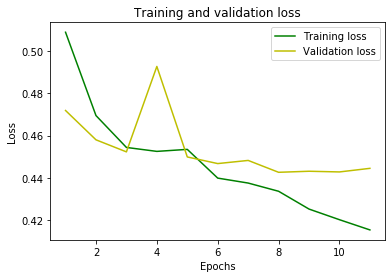

In [8]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

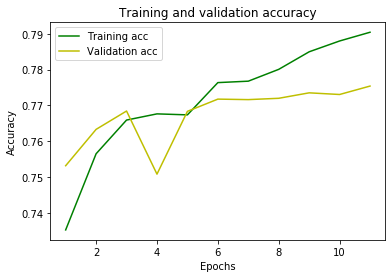

In [9]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1) #?
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

LSTM

In [10]:
# try 1 way LSTM
# Random search drop out rate and number of units/neurons
X_train = np.array(X_train)
X_test = np.array(X_test)
input_shape = (X_train.shape[1], 1)

units = 64

model = Sequential()
model.add(Reshape((50, 50), input_shape=(2500,)))

# 1 sees the past 
# 2 sees the past and the future

dropout = 1.9
print('Number of hidden units: ', units, 'Dropout: ', dropout)
model.add(LSTM(units, input_shape=input_shape)) # 64, $128$, 256, 512
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print('Training...')
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    batch_size = 128, 
    epochs = 13,
    validation_split = 0.1
)

print(model.evaluate(np.array(X_test), y_test), "\n\n")

Number of hidden units:  64 Dropout:  1.9
Training...
Train on 195108 samples, validate on 21679 samples
Epoch 1/13
195108/195108 [==============================] - 123s 632us/step - loss: 0.5519 - accuracy: 0.7098 - val_loss: 0.5231 - val_accuracy: 0.7285
Epoch 2/13
195108/195108 [==============================] - 123s 629us/step - loss: 0.5172 - accuracy: 0.7358 - val_loss: 0.5171 - val_accuracy: 0.7419
Epoch 3/13
195108/195108 [==============================] - 129s 659us/step - loss: 0.4945 - accuracy: 0.7497 - val_loss: 0.4839 - val_accuracy: 0.7523
Epoch 4/13
195108/195108 [==============================] - 129s 663us/step - loss: 0.4766 - accuracy: 0.7588 - val_loss: 0.4818 - val_accuracy: 0.7550
Epoch 5/13
195108/195108 [==============================] - 129s 663us/step - loss: 0.4656 - accuracy: 0.7656 - val_loss: 0.4610 - val_accuracy: 0.7665
Epoch 6/13
195108/195108 [==============================] - 129s 663us/step - loss: 0.4554 - accuracy: 0.7696 - val_loss: 0.4572 - val_

We can plot the training and validation accuracy and loss at each epoch by using the history variable returned by the fit function.

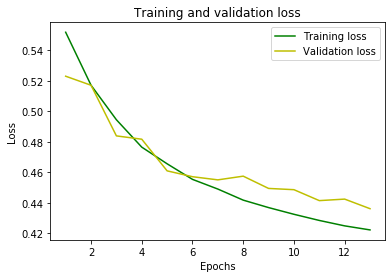

In [11]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

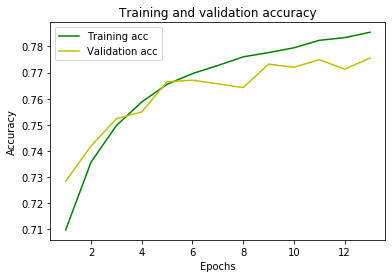

In [12]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1) #?
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<hr/>
Classification Using SKlearn - Traditional ML Algorithms
<hr/>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

h = .02  # step size in the mesh

names = ["Random Forest", "MLP"]

classifiers = [
    RandomForestClassifier(max_depth=10, n_estimators=100),
    MLPClassifier()
]

print("{0:20}{1:40}\n-----------------------------------------------------".\
      format("Classifier", "Accuracy"))

# iterate over classifiers
for name, clf in zip(names, classifiers):
    
    start_time = time()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    end_time = time()
    print("{0:20}{1:40}{2:40}".format(name, str(score), (end_time - start_time)))

Classifier          Accuracy                                
-----------------------------------------------------


MemoryError: Unable to allocate 2.02 GiB for an array with shape (216787, 2500) and data type float32